# <center>Ứng dụng Machine Learning trong bài toán phân tích hệ thống kinh doanh tại công ty MCI</center>

**`feedback-mci-2.xlsx`** là tập dataset được sử dụng để dựa vào phản hồi của Học viên khi đã tham gia các khoá học tại MCI, thông qua đánh giá của Học viên và việc xây dựng các mô hình Học máy phù hợp, doanh nghiệp có thể đánh giá được các tiêu chí phù hợp để Học viên tiếp tục học và có thể giới thiệu cho bạn bè, đồng nghiệp, hoặc đội ngũ Marketing chạy ads hay plan các chương trình hợp lí.
- **#**: Số thứ tự
- **timestamp**: Thời gian gửi feedback
- **name**: Tên Học viên
- **class_code**: Mã lớp Học viên tham gia
- **course_name**: Tên khoá học tương ứng
- **lecturer_name**: Tên giảng viên
- **feedback_time**: Thời điểm feedback
- **understanding_level**: Mức độ hiểu bài
- **understanding_comment**: Bình luận về mức độ hiểu bài
- **expertise_level**: Độ thành thạo
- **enthusiatic_level**: Độ nhiệt huyết
- **approachable_level**: Độ có thể tiếp cận
- **satisfaction_level**: Độ hài lòng
- **unsatisfaction_thing**: Điều chưa hài lòng
- **building_comment**: Xây dựng, đóng góp
- **study_aboard**: Có ý định đi du học hay không?
- **continued**: Tiếp tục tham gia các khoá học khác của MCI hay không?

Trong bài toán xây dựng mô hình này, chúng ta sẽ sử dụng thuật toán **Decision Tree, Random Forest, Logistic Regression** để thực hiện, sau đó sẽ tìm ra mô hình thuật toán phù hợp nhất với tập dữ liệu `feedback-mci-2.xlsx` và tiến hành đưa vào trong hệ thống của MCI.

## 1. Gọi các thư viện cần thiết và tập dữ liệu cần sử dụng (Import libraries and dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelFile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_excel('feedback-mci-2.xlsx')
df = df.drop(columns="#")
df.head()

,timestamp,name,class_code,course_name,lecturer_name,feedback_time,understanding_level,understanding_comment,expertise_level,enthusiatic_level,approachable_level,satisfaction_level,unsatisfaction_thing,building_comment,study_abroad,continued
0,2021-06-15 17:13:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Còn một số chỗ chưa chắc,NaN,5,4,5,5,NaN,NaN,Yes,Tiếp tục
1,2021-06-15 17:13:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,4,4,4,4,NaN,NaN,No,Dừng hợp tác
2,2021-06-15 17:47:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,3,4,4,4,NaN,NaN,No,Dừng hợp tác
3,2021-06-17 10:44:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,4,5,4,4,NaN,NaN,No,Tiếp tục
4,2021-06-18 10:15:00,NaN,V21SA6L1,VBA,Phiên Huỳnh Ngọc PhienHN,Feedback cuối khóa,Đã nắm chắc,NaN,5,4,5,5,NaN,NaN,No,Tiếp tục


## 2. Exploratory Data Analysis (EDA)
- Bước EDA này giúp chúng ta có cái nhìn đầu tiên về dữ liệu. Chúng ta cần có một cảm giác nhất định về những gì mình có trong tay trước khi có những chiến lược xây dựng mô hình. EDA giúp ta mường tượng được độ phức tạp của bài toán và vạch ra những bước đầu tiên cần làm.

In [3]:
# Kiểm tra có tổng bao nhiêu cột và bao nhiêu dòng?
df.shape

(1419, 16)

- Có 1419 dòng và 16 cột

In [4]:
# Kiểm tra dữ liệu có bị thiếu hay không?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              1419 non-null   datetime64[ns]
 1   name                   1061 non-null   object        
 2   class_code             1419 non-null   object        
 3   course_name            1419 non-null   object        
 4   lecturer_name          1419 non-null   object        
 5   feedback_time          1419 non-null   object        
 6   understanding_level    1419 non-null   object        
 7   understanding_comment  940 non-null    object        
 8   expertise_level        1419 non-null   int64         
 9   enthusiatic_level      1419 non-null   int64         
 10  approachable_level     1419 non-null   int64         
 11  satisfaction_level     1419 non-null   int64         
 12  unsatisfaction_thing   551 non-null    object        
 13  bui

**=> Có 1 cột kiểu datetime, 4 cột kiểu integer, 11 cột kiểu string. Trong đó:**
- 4 cột đang có missing value là **understanding_comment, name, building_comment, unsatisfaction_thing**

In [5]:
# Kiểm tra phân bố của dữ liệu (áp dụng với các cột dạng int)
df.describe()

,expertise_level,enthusiatic_level,approachable_level,satisfaction_level
count,1419.000000,1419.000000,1419.000000,1419.000000
mean,4.603946,4.682171,4.540521,4.525018
std,0.608715,0.584025,0.667828,0.683196
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


## 3. Feature Engineering

#### `Chuyển các cột từ dạng string về số dạng nominal`

In [6]:
df1 = pd.read_excel('feedback-mci-2.xlsx')
df1 = df1.drop(columns="#")

In [7]:
continued_rpl = {'Tiếp tục': 1,
            'Dừng hợp tác': 0}
df.continued = df.continued.map(continued_rpl)
df1.continued = df1.continued.map(continued_rpl)
df.head()

,timestamp,name,class_code,course_name,lecturer_name,feedback_time,understanding_level,understanding_comment,expertise_level,enthusiatic_level,approachable_level,satisfaction_level,unsatisfaction_thing,building_comment,study_abroad,continued
0,2021-06-15 17:13:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Còn một số chỗ chưa chắc,NaN,5,4,5,5,NaN,NaN,Yes,1
1,2021-06-15 17:13:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,4,4,4,4,NaN,NaN,No,0
2,2021-06-15 17:47:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,3,4,4,4,NaN,NaN,No,0
3,2021-06-17 10:44:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,4,5,4,4,NaN,NaN,No,1
4,2021-06-18 10:15:00,NaN,V21SA6L1,VBA,Phiên Huỳnh Ngọc PhienHN,Feedback cuối khóa,Đã nắm chắc,NaN,5,4,5,5,NaN,NaN,No,1


In [8]:
study_ab = {'Yes': 1,
            'No': 0}
df.study_abroad = df.study_abroad.map(study_ab)
df1.study_abroad = df1.study_abroad.map(study_ab)
df.head()

,timestamp,name,class_code,course_name,lecturer_name,feedback_time,understanding_level,understanding_comment,expertise_level,enthusiatic_level,approachable_level,satisfaction_level,unsatisfaction_thing,building_comment,study_abroad,continued
0,2021-06-15 17:13:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Còn một số chỗ chưa chắc,NaN,5,4,5,5,NaN,NaN,1,1
1,2021-06-15 17:13:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,4,4,4,4,NaN,NaN,0,0
2,2021-06-15 17:47:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,3,4,4,4,NaN,NaN,0,0
3,2021-06-17 10:44:00,NaN,PY33SA6L1,Python,Viet Anh Nguyen vietanh,Feedback cuối khóa,Đã nắm chắc,NaN,4,5,4,4,NaN,NaN,0,1
4,2021-06-18 10:15:00,NaN,V21SA6L1,VBA,Phiên Huỳnh Ngọc PhienHN,Feedback cuối khóa,Đã nắm chắc,NaN,5,4,5,5,NaN,NaN,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lecturer_label = le.fit_transform(df['lecturer_name'])
lecturer_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
df.lecturer_name = le.transform(df.lecturer_name)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
understanding_label = le.fit_transform(df['understanding_level'])
understanding_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
df.understanding_level = le.transform(df.understanding_level)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
course_label = le.fit_transform(df['course_name'])
course_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
df.course_name = le.transform(df.course_name)

In [66]:
# Dictionary tên giảng viên được gán nhãn norminal
lecturer_mappings

{0: 'Bình Đinh Công binhdinh',
 1: 'Bùi Tú Tubt',
 2: 'Chuong Nguyen chuongnm',
 3: 'Hieu Nguyen hieunguyen1496@gmail.com',
 4: 'Huy Thạch Quang huytq',
 5: 'Hùng Nguyễn Mạnh hungnm',
 6: 'Hạnh Trần Thị Hồng hanhtth',
 7: 'Hồng Đỗ Bích Hongdb',
 8: 'Khanh Nguyen khanhnguyen94',
 9: 'Khoa Nguyễn Võ Đăng nkhoa1987',
 10: 'Khánh Tạ khanhta',
 11: 'Kim Dung Ha dung.hakim',
 12: 'LA QUOC LUONG laquocluong',
 13: 'Le Thao thaolt.ba',
 14: 'Linh Lương Mỹ Linh.ltm',
 15: 'Linh Tran linhtrankt53',
 16: 'Lê Như Gia Bình lenhugiabinh@gmail.com',
 17: 'Lạc Phạm Xuân nguoibanso25',
 18: 'Minh Đinh Công minhdc2',
 19: 'Nghị Tống Châu tongnghi',
 20: 'Nguyen Huu Minh minhhuunguyen',
 21: 'Nguyễn Mạnh Trường nmtruong',
 22: 'Nguyễn Thị Lam Phương Phuongntl',
 23: 'Nguyễn Tiến Đình dinhuit',
 24: 'Ngô Hoàng Quốc Tân tanquoc0309',
 25: 'Nhi Nguyễn Hoàng nhinguyen1807',
 26: 'Phan Duy Thanh thanhmk4@gmail.com',
 27: 'Phiên Huỳnh Ngọc PhienHN',
 28: 'Phạm Nguyên Hạnh Hanhpn',
 29: 'Thanh Phan Duy thanhmk4

In [67]:
understanding_mappings

{0: 'Chưa nắm được gì', 1: 'Còn một số chỗ chưa chắc', 2: 'Đã nắm chắc'}

In [68]:
course_mappings

{0: 'Business Analyst',
 1: 'Excel',
 2: 'PowerBI',
 3: 'Python',
 4: 'R',
 5: 'SQL',
 6: 'VBA'}

## 4. Trực quan hoá dữ liệu và nhận xét tổng quan

### Đánh giá cột nhãn

In [12]:
number_continued = df1.continued.value_counts()
number_continued

1    1125
0     294
Name: continued, dtype: int64

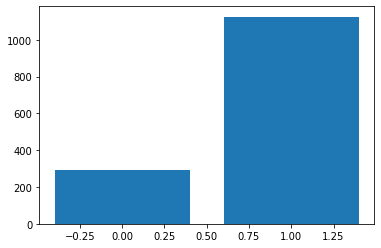

In [13]:
plt.bar(data=number_continued.reset_index(),x='index',height='continued')
plt.show()

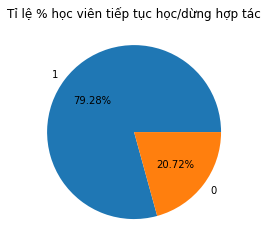

In [14]:
plt.pie(number_continued,autopct='%.2f%%',labels=number_continued.index)
plt.title('Tỉ lệ % học viên tiếp tục học/dừng hợp tác')
plt.show()

**Tỉ lệ giữa `Dừng hợp tác` với `Tiếp tục học` là 20.72% và 79.28%**

### Kiểm tra phân phối của dữ liệu (áp dụng với các cột kiểu int)

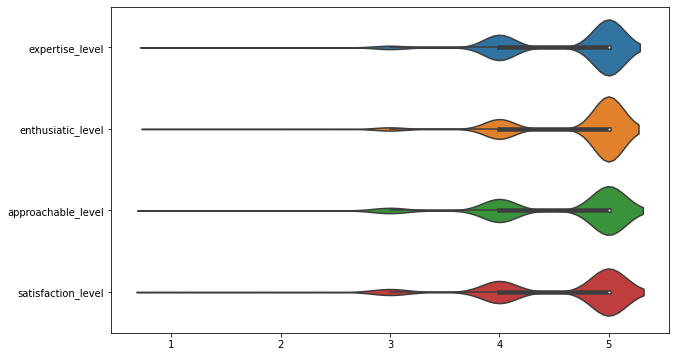

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df1[['expertise_level','enthusiatic_level','approachable_level','satisfaction_level']], orient = "h")
plt.show()

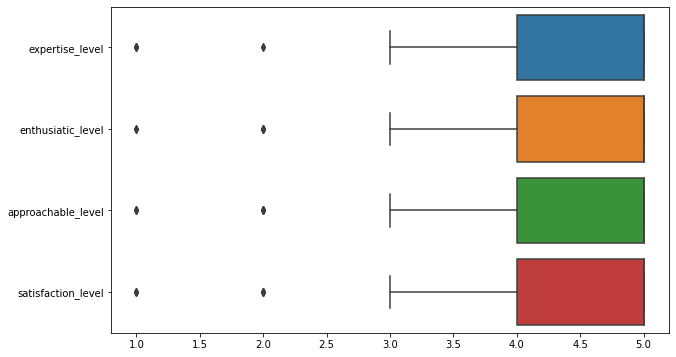

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1[['expertise_level','enthusiatic_level','approachable_level','satisfaction_level']], orient = "h")
plt.show()

**Nhận xét:**
- Dữ liệu của các cột đều có đặc điểm chung là nằm nghiêng về bên phải. Nói cách khác, thang điểm 4 và 5 xuất hiện rất nhiều trong tập dữ liệu, dẫn đến đồ thị phân phối nằm nghiêng bên phải.
- Các cột như **expertise_level, enthusiatic_level, approachable_level, satisfaction_level** có xu hướng đi theo 1 đặc điểm chung: Tập trung chủ yếu vào điểm 5 và 4 và ít dần ở điểm 3. Điểm 1 và 2 xuất hiện rất ít trong tập dữ liệu => Hình thành outlier trong phân phối.

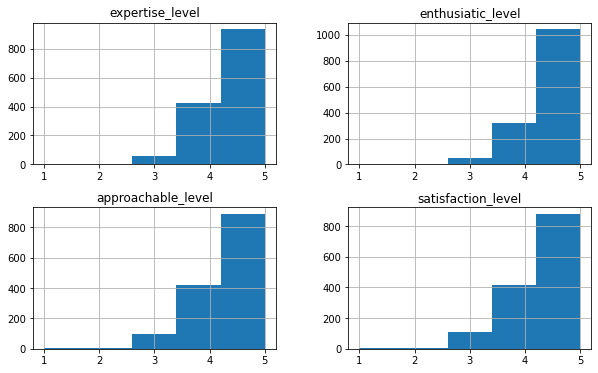

In [17]:
df1[['expertise_level','enthusiatic_level','approachable_level','satisfaction_level']].hist(bins=5, figsize=(10,6))
plt.show()

**Nhận xét:**
- Có thể thấy mức đánh giá điểm tập trung mạnh ở điểm 5, các điểm còn lại ít hơn đáng kể

### Tỉ lệ giữa tiếp tục học và dừng hợp tác theo từng bộ môn

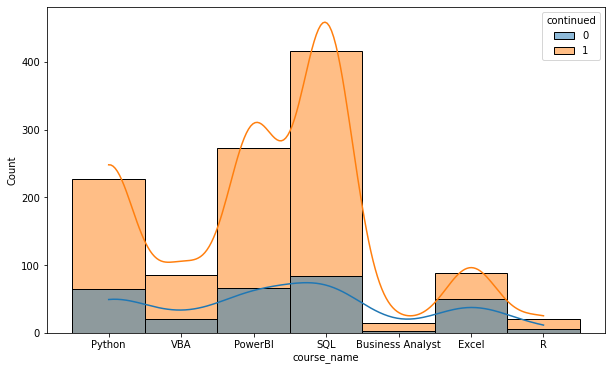

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='course_name', hue='continued',kde=True)
plt.show()

**Insight 1 và đề xuất:**

- Nhìn chung, các bộ môn sau khi học viên học đều đem lại trải nghiệm tốt, học viên phần lớn đều lựa chọn sẽ **Tiếp tục** học các khoá học khác tại trung tâm. Tuy nhiên, bộ môn Excel nhận được phản hồi **Dừng hợp tác** chiếm tỉ trọng khá lớn => MCI cần xem lại về giáo trình hay phương pháp giảng dạy cho bộ môn này.
- Số lượng feedback của khoá Business Analyst và R khá thấp, tuy nhiên feedback cho khoá học này nhận được phản hồi rất tốt, tỉ lệ tiếp tục học lớn. Hai lí do cần chú ý:
    - Dữ liệu thu thập được cho 2 khoá này không đủ, nên chưa có sự đánh giá chính xác nhất về khoá học này.
    - Trong trường hợp dữ liệu thu thập được là đủ, MCI nên cân nhắc trong việc tập trung vào đào tạo 2 khoá học này hơn.


In [19]:
# Hiển thị danh sách các giảng viên theo từng bộ môn giảng dạy tại MCI
df0 = df1.iloc[:,3:5]
df2 = df0.drop_duplicates().sort_values('course_name')
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(df2)
df2.shape

,course_name,lecturer_name
102,Business Analyst,Le Thao thaolt.ba
478,Excel,Bình Đinh Công binhdinh
272,Excel,Trung Lê Xuân TrungLe
248,Excel,Tiến Nguyễn Đức ndtien
235,Excel,Tiến Ngô Đức ndtien
142,Excel,Kim Dung Ha dung.hakim
833,Excel,Phiên Huỳnh Ngọc PhienHN
1150,Excel,Khánh Tạ khanhta
1374,Excel,Nguyễn Thị Lam Phương Phuongntl
52,PowerBI,Hùng Nguyễn Mạnh hungnm


(64, 2)

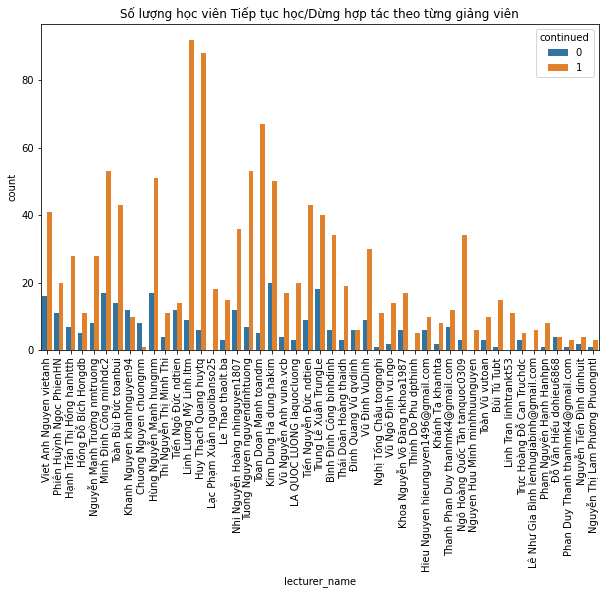

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='lecturer_name', hue='continued').set(title='Số lượng học viên Tiếp tục học/Dừng hợp tác theo từng giảng viên')
plt.xticks(rotation=90)
plt.show()

In [21]:
count_end = df1[df1['continued']==0].lecturer_name.value_counts().to_frame().reset_index().rename(columns= {'lecturer_name': 'end'})
count_continued = df1[df1['continued']==1].lecturer_name.value_counts().to_frame().reset_index().rename(columns= {'lecturer_name': 'continued'})
count_done = count_end.merge(count_continued, on='index')
count_done['percent'] = round(count_done['end']/(count_done['continued']+count_done['end'])*100,2)
count_done = count_done.sort_values(by='percent').rename(columns= {'index': 'lecturer_name'})
count_done.head(15)

,lecturer_name,end,continued,percent
37,Bùi Tú Tubt,1,15,6.25
22,Huy Thạch Quang huytq,6,88,6.38
23,Toan Doan Manh toandm,5,67,6.94
32,Ngô Hoàng Quốc Tân tanquoc0309,3,34,8.11
39,Nghị Tống Châu tongnghi,1,11,8.33
12,Linh Lương Mỹ Linh.ltm,9,92,8.91
38,Phạm Nguyên Hạnh Hanhpn,1,8,11.11
15,Tuong Nguyen nguyendinhtuong,7,53,11.67
35,Vũ Ngô Định vu.ngo,2,14,12.50
29,LA QUOC LUONG laquocluong,3,20,13.04


**Insight 2 và đề xuất:**

Có thể thấy một số giảng viên nhận được phản hồi tốt, nhận được feedback tiếp tục học vượt trội, từ đó với từng bộ môn giảng dạy, MCI có thể tập trung vào các chương trình học thử/workshop/webinar do các giảng viên đó đứng lớp, nhờ đó dễ dàng hơn trong việc thu hút học viên tham gia học các khoá học tại MCI.

### Biểu đồ tương quan giữa các cột đặc trưng so với cột nhãn

In [22]:
df1.corr()

,expertise_level,enthusiatic_level,approachable_level,satisfaction_level,study_abroad,continued
expertise_level,1.000000,0.706954,0.617189,0.612270,0.008910,0.547387
enthusiatic_level,0.706954,1.000000,0.636052,0.646502,0.011011,0.600305
approachable_level,0.617189,0.636052,1.000000,0.934059,0.014485,0.617061
satisfaction_level,0.612270,0.646502,0.934059,1.000000,0.013157,0.642495
study_abroad,0.008910,0.011011,0.014485,0.013157,1.000000,0.004483
continued,0.547387,0.600305,0.617061,0.642495,0.004483,1.000000


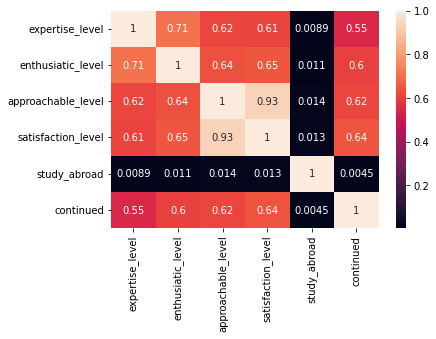

In [23]:
sns.heatmap(data=df1.corr(), annot=True)
plt.show()

Mục tiêu của chúng ta là tìm được các chỉ số có sự tương quan giữa **Cột nhãn (Continued)** và các chỉ số thuộc các cột còn lại. Các chỉ số thể hiện sự tương quan với **Continued** là:
- **expertise_level**: 0.55
- **enthusiatc_level:** 0.6
- **approachable_level:** 0.62
- **satisfaction_level:** 0.64
- **study_aboard:** 0.045 -> Chỉ số tương quan của cột này với nhãn thấp => Việc học viên tiếp tục học hay không không bị tác động quá nhiều bởi đặc trưng này -> Có thể cân nhắc loại bỏ đặc trưng này trong khi xây dựng mô hình.

In [24]:
df = df.drop(columns=['timestamp','name','class_code','feedback_time','understanding_comment','unsatisfaction_thing','building_comment','study_abroad'])

In [70]:
df.head(5)

,course_name,lecturer_name,understanding_level,expertise_level,enthusiatic_level,approachable_level,satisfaction_level,continued
0,3,41,1,5,4,5,5,1
1,3,41,2,4,4,4,4,0
2,3,41,2,3,4,4,4,0
3,3,41,2,4,5,4,4,1
4,6,27,2,5,4,5,5,1


In [26]:
X = df.drop(columns = ['continued'])
Y = df.continued

### Áp dụng kĩ thuật `Upsampling`
- Khi tập dữ liệu classification có tỉ lệ nhãn chênh lệch lớn, dù có xây dựng mô hình tốt đến đâu, nó cũng sẽ fit dữ liệu vào phần tỉ lệ nhãn chiếm nhiều hơn (nói cách khác, mô hình sẽ học rất tốt vào phần nhãn trả về kết quả = 1) => Khả năng cao dự đoán cho phần nhãn ít hơn sẽ không tốt bằng.
Do đó, Upsampling sẽ đẩy phần dữ liệu nhãn đang có tỉ trọng thấp hơn bằng với số lượng bản ghi của phần nhãn có tỉ trọng cao hơn.
**Lưu ý: Việc Upsampling không phải sẽ nhân đúp các bản ghi mà nó sẽ lấy những thông tin lân cận của dữ liệu, dựa theo hành vi của những dữ liệu trong khoảng của chúng để tạo ra các bản ghi mới => Khả năng học được từ nhãn khi được upsampling sẽ cao hơn**

In [27]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

In [28]:
Y.value_counts()

1    1125
0    1125
Name: continued, dtype: int64

## 5. Huấn luyện mô hình (Train model)
- Logistic Regression
- Decision Tree
- Random Forest

### 5.1. Mô hình Logistic Regression
![](https://miro.medium.com/max/1280/1*CYAn9ACXrWX3IneHSoMVOQ.gif)

Logistic Regression là 1 thuật toán phân loại được dùng để gán các đối tượng cho 1 tập hợp giá trị rời rạc (như 0, 1, 2, …). Một ví dụ điển hình là phân loại Email, gồm có email công việc, email gia đình, email spam,… giao dịch trực tuyến có là an toàn hay không an toàn, khối u lành tính hay ác tình. Thuật toán trên dùng hàm sigmoid logistic để đưa ra đánh giá theo xác suất. Ví dụ: Khối u này 80% là lành tính, giao dịch này 90% là gian lận,…

#### 5.1.1. Chia tập dữ liệu thành các phần với tỉ lệ huấn luyện/dự đoán: 80/20
- **xtrain:** Tập đặc trưng để đưa vào huấn luyện
- **xtest:** Tập đặc trưng để đưa vào dự đoán
- **ytrain:** Tập nhãn để đưa vào huấn luyện
- **ytest:** Tập nhãn để đưa vào dự đoán

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=42)

**`Kiểm tra dữ liệu đã chia đúng hay chưa?`**

In [31]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1800, 7), (450, 7), (1800,), (450,))

In [32]:
clf = LogisticRegression(max_iter=1000)

#### 5.1.2. Đưa tập dữ liệu xtrain, ytrain vào huấn luyện

In [33]:
clf.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

**`Sau khi huấn luyện mô hình, tiến hành dự đoán dữ liệu trên tập kiểm thử`**

In [34]:
y_predict = clf.predict(xtest)
y_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

#### 5.1.3. Đánh giá mô hình Classification: Logistic Regression

Dataframe so sánh giữa kết quả nhãn nhận được từ mô hình và kết quả với tập nhãn gốc dựa trên tập kiểm thử:

In [35]:
pd.DataFrame({'prediction':y_predict,
              'groundtruth': ytest})

,prediction,groundtruth
940,1,1
482,0,1
581,1,1
247,1,1
1659,0,0
...,...,...
115,1,1
76,1,1
416,0,1
1249,1,1


**4 tiêu chí cơ bản để đánh giá mô hình:**
   - `accuracy`
   - `recall`
   - `f1-score`
   - `precision`

In [36]:
print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       228
           1       0.90      0.89      0.90       222

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



   - `accuracy`: 90%
   - `recall`: nhãn 0: 91%, nhãn 1: 89%
   - `f1-score`: nhãn 0: 90%, nhãn 1: 90%
   - `precision`: nhãn 0: 89%, nhãn 1: 90%

### **`Confusion Matrix`**

In [37]:
cfs_mtrix = confusion_matrix(ytest, y_predict)
cfs_mtrix

array([[207,  21],
       [ 25, 197]])

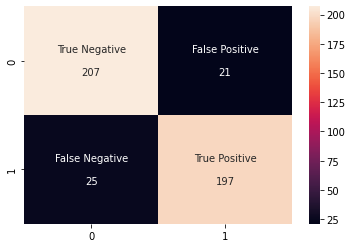

In [38]:
name = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(name, cfs_mtrix.flatten())]);
sns.heatmap(cfs_mtrix, annot=labels.reshape(2,2), fmt='')
plt.show()

- `True Negative`: Kết quả trên tập nhãn gốc là 'Dừng hợp tác', mô hình dự đoán là 'Dừng hợp tác' (207 kết quả)
- `False Positive`: Kết quả trên tập nhãn gốc là 'Dừng hợp tác', mô hình dự đoán là 'Tiếp tục' (21 kết quả)
- `False Negative`: Kết quả trên tập nhãn gốc là 'Tiếp tục', mô hình dự đoán là 'Dừng hợp tác' (25 kết quả)
- `True Positive`: Kết quả trên tập nhãn gốc là 'Tiếp tục', mô hình dự đoán là 'Tiếp tục' (197 kết quả)

### 5.2. Mô hình Cây quyết định (Decision Tree)
![](https://miro.medium.com/max/1200/1*Bg0_UGT6xo89Ij-GX61yPg.png)
Cây quyết định là một kiểu mô hình dự báo (predictive model), nghĩa là một ánh xạ từ các quan sát về một sự vật/hiện tượng tới các kết luận về giá trị mục tiêu của sự vật/hiện tượng. Mỗi một nút trong (internal node) tương ứng với một biến; đường nối giữa nó với nút con của nó thể hiện một giá trị cụ thể cho biến đó. Mỗi nút lá đại diện cho giá trị dự đoán của biến mục tiêu, cho trước các giá trị của các biến được biểu diễn bởi đường đi từ nút gốc tới nút lá đó.

#### 5.2.1. Chia tập dữ liệu thành các phần với tỉ lệ huấn luyện/dự đoán: 80/20
- **xtrain:** Tập đặc trưng để đưa vào huấn luyện
- **xtest:** Tập đặc trưng để đưa vào dự đoán
- **ytrain:** Tập nhãn để đưa vào huấn luyện
- **ytest:** Tập nhãn để đưa vào dự đoán

xtrain, xtest, ytrain, ytest

#### 5.2.2. Đưa tập dữ liệu xtrain, ytrain vào huấn luyện

In [56]:
tree = DecisionTreeClassifier(criterion='gini')

In [57]:
tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [58]:
y_pred = tree.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

Dataframe so sánh giữa kết quả nhãn nhận được từ mô hình và kết quả với tập nhãn gốc dựa trên tập kiểm thử:

In [60]:
pd.DataFrame({'prediction':y_pred,
              'groundtruth': ytest})

,prediction,groundtruth
940,1,1
482,0,1
581,1,1
247,0,1
1659,0,0
...,...,...
115,1,1
76,1,1
416,1,1
1249,1,1


#### 5.2.3. Đánh giá mô hình Decision Tree

In [61]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       228
           1       0.94      0.93      0.93       222

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



   - `accuracy`: 94%
   - `recall`: nhãn 0: 94%, nhãn 1: 93%
   - `f1-score`: nhãn 0: 94%, nhãn 1: 91%
   - `precision`: nhãn 0: 93%, nhãn 1: 94%

In [62]:
tree_cm = confusion_matrix(ytest, y_pred)
tree_cm

array([[214,  14],
       [ 15, 207]])

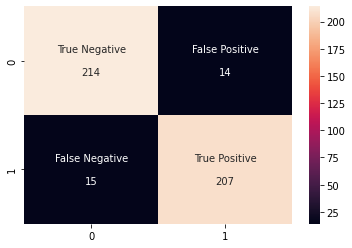

In [63]:
name = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(name, tree_cm.flatten())]);
sns.heatmap(tree_cm, annot=labels.reshape(2,2), fmt='')
plt.show()

- `True Negative`: Kết quả trên tập nhãn gốc là 'Dừng hợp tác', mô hình dự đoán là 'Dừng hợp tác' (214 kết quả)
- `False Positive`: Kết quả trên tập nhãn gốc là 'Dừng hợp tác', mô hình dự đoán là 'Tiếp tục' (14 kết quả)
- `False Negative`: Kết quả trên tập nhãn gốc là 'Tiếp tục', mô hình dự đoán là 'Dừng hợp tác' (15 kết quả)
- `True Positive`: Kết quả trên tập nhãn gốc là 'Tiếp tục', mô hình dự đoán là 'Tiếp tục' (207 kết quả)

### 5.3. Mô hình Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

Random Forest có thể coi là một 'rừng' các cây quyết định. Cơ chế hoạt động của thuật toán này là thay vì lấy toàn bộ tập dữ liệu vào trong một cây quyết định, mỗi cây trong Random Forest sẽ chỉ lấy khoảng 80% các biến, các đặc trưng, và thuật toán này sẽ huấn luyện các cây con để đưa ra các bộ rules khác nhau. Sau khi đã thu thập đủ các kết quả từ các cây con, kết quả nào xuất hiện với tần suất cao nhất sẽ được lựa chọn làm kết quả cuối cùng.

#### 5.3.1. Chia tập dữ liệu thành các phần với tỉ lệ huấn luyện/dự đoán: 80/20
- **xtrain:** Tập đặc trưng để đưa vào huấn luyện
- **xtest:** Tập đặc trưng để đưa vào dự đoán
- **ytrain:** Tập nhãn để đưa vào huấn luyện
- **ytest:** Tập nhãn để đưa vào dự đoán

#### 5.3.2. Đưa tập dữ liệu xtrain, ytrain vào huấn luyện

In [47]:
forest = RandomForestClassifier()

In [48]:
forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [49]:
y_predict2 = forest.predict(xtest)

#### 5.3.3. Đánh giá mô hình Random Forest

In [50]:
print(classification_report(ytest, y_predict2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       228
           1       0.91      0.93      0.92       222

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



   - `accuracy`: 92%
   - `recall`: nhãn 0: 93%, nhãn 1: 91%
   - `f1-score`: nhãn 0: 92%, nhãn 1: 92%
   - `precision`: nhãn 0: 93%, nhãn 1: 91%

In [54]:
forest_cm = confusion_matrix(ytest, y_predict2)

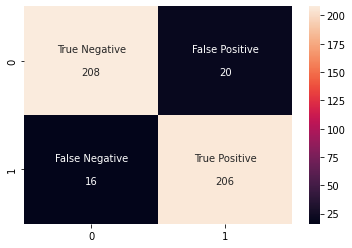

In [52]:
name = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(name, forest_cm.flatten())]);
sns.heatmap(forest_cm, annot=labels.reshape(2,2), fmt='')
plt.show()

- `True Negative`: Kết quả trên tập nhãn gốc là 'Dừng hợp tác', mô hình dự đoán là 'Dừng hợp tác' (208 kết quả)
- `False Positive`: Kết quả trên tập nhãn gốc là 'Dừng hợp tác', mô hình dự đoán là 'Tiếp tục' (20 kết quả)
- `False Negative`: Kết quả trên tập nhãn gốc là 'Tiếp tục', mô hình dự đoán là 'Dừng hợp tác' (16 kết quả)
- `True Positive`: Kết quả trên tập nhãn gốc là 'Tiếp tục', mô hình dự đoán là 'Tiếp tục' (206 kết quả)

## 6. Kết luận
Mô hình được lựa chọn để đưa vào hệ thống của MCI là **Decision Tree** bởi:
- Xét theo các tiêu chí đánh giá mô hình của cả 3 thuật toán (Logistic Regression, Decision Tree và Random Forest), các thang điểm của Decision Tree đạt ngưỡng tốt nhất, các giá trị được dự đoán bởi mô hình trả về không chính xác theo tập nhãn thấp nhất.

In [64]:
# Lưu mô hình
import pickle
pickle.dump(tree, open('model.pkl','wb'))

## 7. Tiến hành đưa mô hình vào hệ thống